In [1]:
import prospect.io.read_results as pread
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chisquare
import sys, os, glob
#res287, obs287, mod287 = pread.results_from("/Volumes/SML/UF/prospector_runs/halo287/halo287_1_1548172242_mcmc.h5")
#res352, obs352, mod352 = pread.results_from("/Volumes/SML/UF/prospector_runs/halo352/halo352_1548344906_mcmc.h5")
#res374, obs374, mod374 = pread.results_from("/Volumes/SML/UF/prospector_runs/halo374/halo374_1_1548348647_mcmc.h5")
#res401, obs401, mod401 = pread.results_from("/Volumes/SML/UF/prospector_runs/halo401/halo401_1_1548351652_mcmc.h5")

In [2]:


res, obs, mod = pread.results_from('/Users/sidneylower/Documents/snap305_1000_cont/snap305.galaxy189_1556108727_mcmc.h5')




In [3]:
res['theta_labels']

['logzsol',
 'dust2',
 'logmass',
 'logsfr_ratios_1',
 'logsfr_ratios_2',
 'logsfr_ratios_3',
 'logsfr_ratios_4',
 'logsfr_ratios_5',
 'logsfr_ratios_6',
 'logsfr_ratios_7',
 'duste_umin',
 'duste_qpah',
 'duste_gamma',
 'dust1',
 'dust_index']

In [5]:
list(res.keys())

['run_params',
 'model_params',
 'paramfile_text',
 'prospector_version',
 'optimizer_duration',
 'chain',
 'efficiency',
 'information',
 'lnlikelihood',
 'lnprobability',
 'logvol',
 'logz',
 'logzerr',
 'niter',
 'samples_id',
 'weights',
 'ncall',
 'theta_labels',
 'sampling_duration',
 'obs',
 'model',
 'optimization_results']

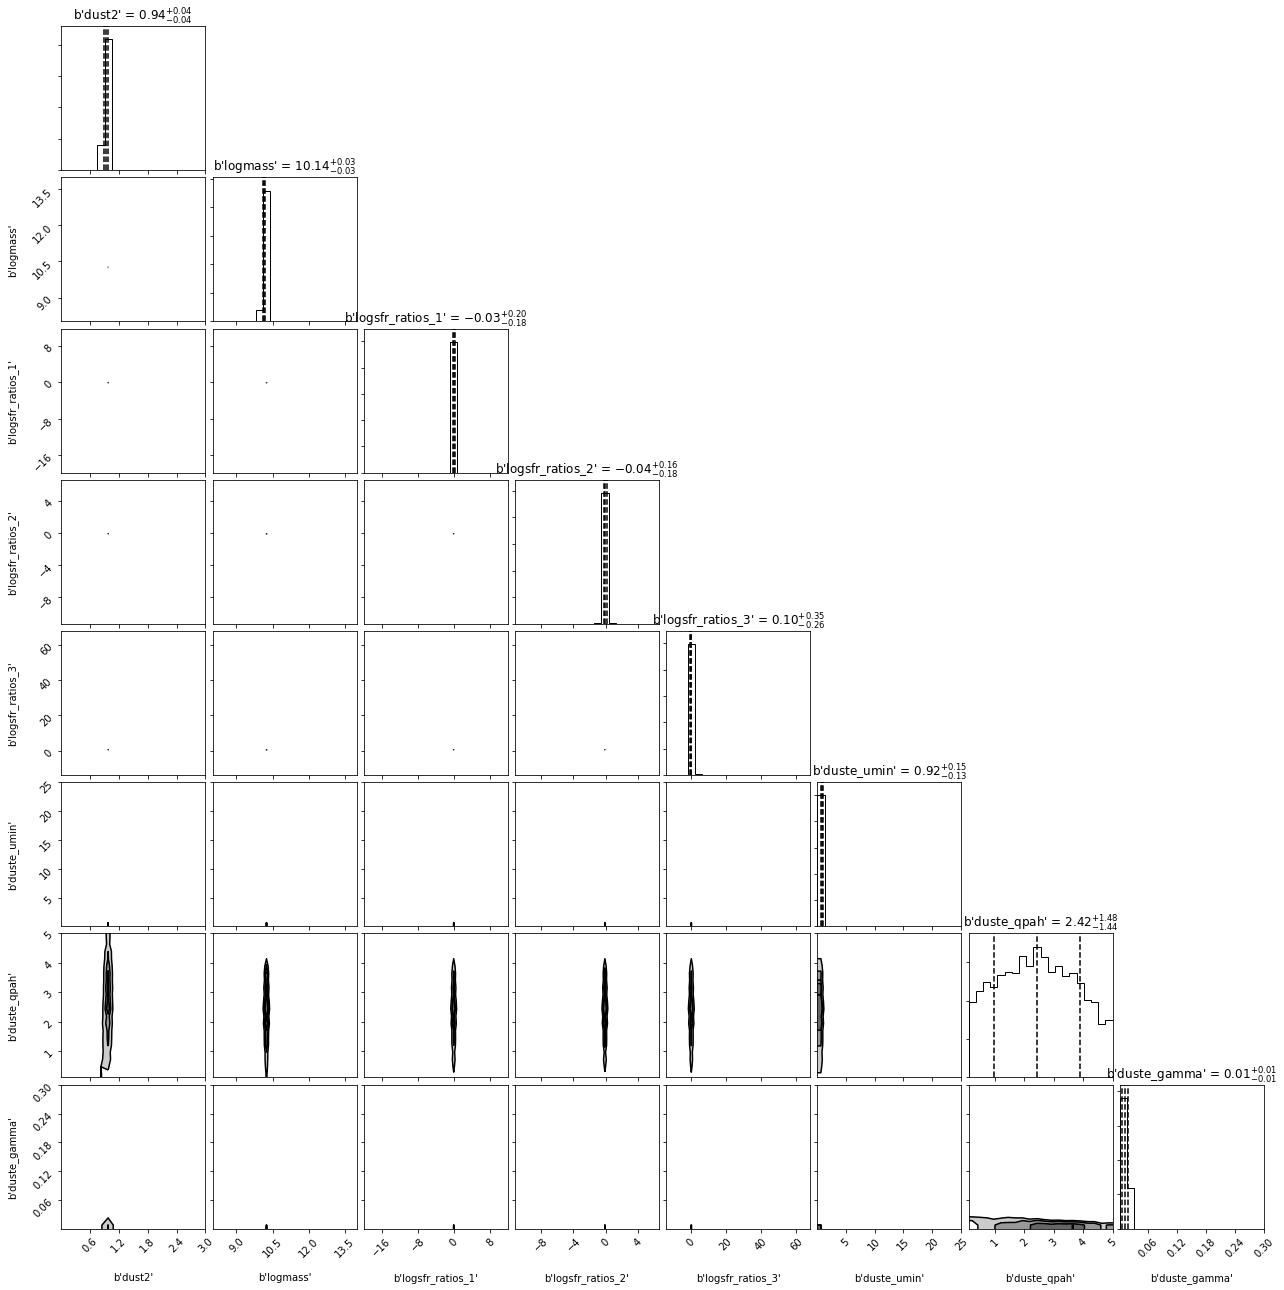

In [6]:
# Corner figure of posterior PDFs
corner = pread.subcorner(res)

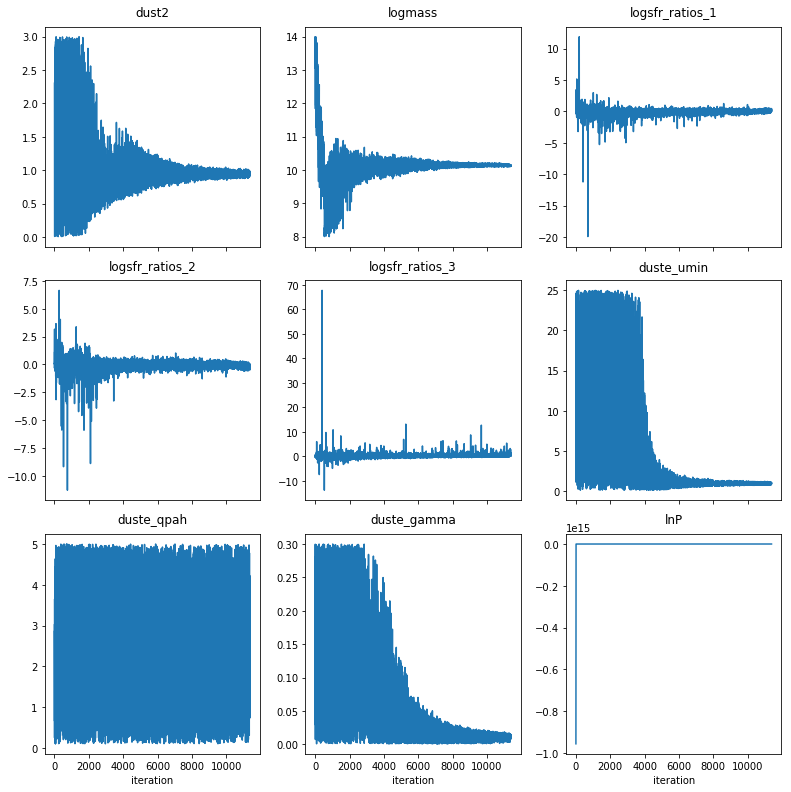

In [7]:
tri = pread.traceplot(res)

In [15]:
def get_best(res, **kwargs):
    """Get the maximum a posteriori parameters.
    From prospect.utils.plotting
    """
    imax = np.argmax(res['lnprobability'])
    # there must be a more elegant way to deal with differnt shapes
    try:
        i, j = np.unravel_index(imax, res['lnprobability'].shape)
        theta_best = res['chain'][i, j, :].copy()
    except(ValueError):
        theta_best = res['chain'][imax, :].copy()

    theta_names = res.get('theta_labels', res['theta_labels'])
    return theta_names, theta_best

In [16]:
thetas, theta_best = get_best(res)
sps = pread.get_sps(res)
mspec_map, mphot_map, _ = mod.mean_model(theta_best, obs, sps=sps)
wspec = sps.wavelengths
wave = [f.wave_effective for f in res['obs']['filters']]

In [18]:
theta_best

array([ 9.5591247e-01,  1.0154599e+01, -1.3591719e-02, -5.0905272e-02,
       -2.9020233e-03,  9.5486051e-01,  2.9680445e+00,  1.0974212e-02],
      dtype=float32)

(1.0, 100000000000.0)

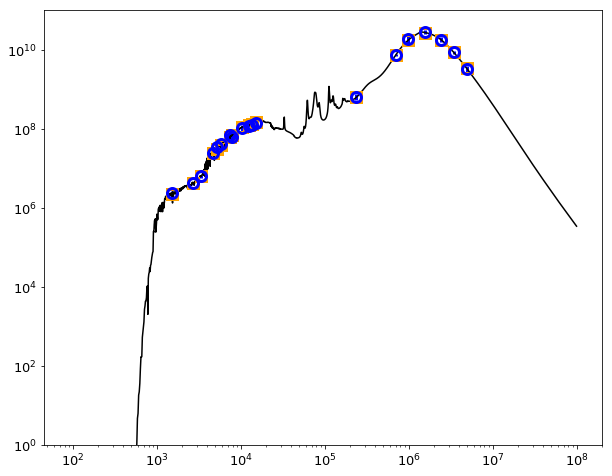

In [97]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.loglog(wspec, mspec_map, label='Best Fit Model',
       lw=1.5, color='black')
plt.errorbar(wave, mphot_map, label='Model photometry',
         marker='s', markersize=10, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='orange', 
         markeredgewidth=3)
plt.errorbar(wave, res['obs']['maggies'], yerr=res['obs']['maggies_unc'], 
         label='Observed photometry', ecolor='blue', 
         marker='o', markersize=10, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='blue', 
         markeredgewidth=3)
plt.ylim([1e0, 1e11])

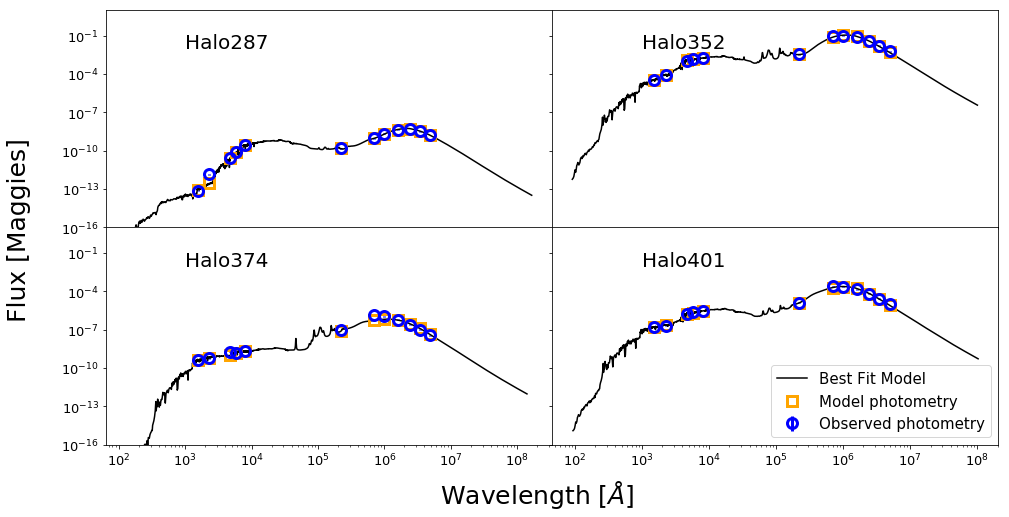

In [48]:
#plot SED

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16, 8))


#plt.ylabel('Maggies', fontsize=25)
#plt.xlabel('Wavelength [$\AA$]', fontsize=25)
#plt.legend(loc='best', fontsize=20)
f.subplots_adjust(hspace=0.0, wspace=0.0)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.tick_params(axis='both', which='minor', labelsize=10)
ax3.tick_params(axis='both', which='major', labelsize=13)
ax3.tick_params(axis='both', which='minor', labelsize=10)
ax4.tick_params(axis='x', which='major', labelsize=13)
ax4.tick_params(axis='x', which='minor', labelsize=10)

#halo287
ax1.loglog(wspec287, mspec_map287, label='Best Fit Model',
       lw=1.5, color='black')
ax1.errorbar(wave287, mphot_map287, label='Model photometry',
         marker='s', markersize=10, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='orange', 
         markeredgewidth=3)
ax1.errorbar(wave287, res287['obs']['maggies'], yerr=res287['obs']['maggies_unc'], 
         label='Observed photometry', ecolor='blue', 
         marker='o', markersize=10, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='blue', 
         markeredgewidth=3)
ax1.annotate("Halo287", xy=(1e3, 1e-2), fontsize=20)
#ax1.annotate("$\chi^2 =$"+str(chi287), xy=(1e3, 7e-4), fontsize=15)
ax1.set_ylim([1e-16, 1e1])

#halo352
ax2.loglog(wspec352, mspec_map352, label='Best Fit Model',
       lw=1.5, color='black')
ax2.errorbar(wave352, mphot_map352, label='Model photometry',
         marker='s', markersize=10, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='orange', 
         markeredgewidth=3)
ax2.errorbar(wave352, res352['obs']['maggies'], yerr=res352['obs']['maggies_unc'], 
         label='Observed photometry', ecolor='blue', 
         marker='o', markersize=10, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='blue', 
         markeredgewidth=3)
ax2.annotate("Halo352", xy=(1e3, 1e-2), fontsize=20)
#ax2.annotate("$\chi^2 =$"+str(chi352), xy=(1e3, 7e-4), fontsize=15)

#halo374
ax3.loglog(wspec374, mspec_map374, label='Best Fit Model',
       lw=1.5, color='black')
ax3.errorbar(wave374, mphot_map374, label='Model photometry',
         marker='s', markersize=10, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='orange', 
         markeredgewidth=3)
ax3.errorbar(wave374, res374['obs']['maggies'], yerr=res374['obs']['maggies_unc'], 
         label='Observed photometry', ecolor='blue', 
         marker='o', markersize=10, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='blue', 
         markeredgewidth=3)
ax3.annotate("Halo374", xy=(1e3, 1e-2), fontsize=20)
#ax3.annotate("$\chi^2 =$"+str(chi374), xy=(1e3, 7e-4), fontsize=15)
ax3.set_ylim([1e-16, 1e1])

#halo401
ax4.loglog(wspec401, mspec_map401, label='Best Fit Model',
       lw=1.5, color='black')
ax4.errorbar(wave401, mphot_map401, label='Model photometry',
         marker='s', markersize=10, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='orange', 
         markeredgewidth=3)
ax4.errorbar(wave401, res401['obs']['maggies'], yerr=res401['obs']['maggies_unc'], 
         label='Observed photometry', ecolor='blue', 
         marker='o', markersize=10, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='blue', 
         markeredgewidth=3)
ax4.annotate("Halo401", xy=(1e3, 1e-2), fontsize=20)
#ax4.annotate("$\chi^2 =$"+str(chi401), xy=(1e3, 7e-4), fontsize=15)

f.text(0.5,0.04, 'Wavelength [$\AA$]', fontsize=25, ha="center", va="center")
f.text(0.05,0.5, 'Flux [Maggies]', fontsize=25, ha="center", va="center", rotation=90)
plt.legend(loc='best', fontsize=15)

plt.savefig('/Users/sidneylower/Desktop/halo_SEDs.png', dpi=300)

In [21]:
tfig = pread.traceplot(res)
#plt.savefig('/Users/sidneylower/Desktop/fsps_prospectortest_tauChains.png')

NameError: name 'res' is not defined

In [20]:
def B_nu(nu,T):
    from astropy.constants import c, k_B, h
    c, k_B, h = c.value, k_B.value, h.value
    return 2.0 * h * nu**3. * c**-2. / (np.exp(h*nu/(k_B * T)) - 1.0)

In [21]:
def get_dustmass(Snu,Td,z,nu=345.0):
    """
    Quick dust mass calculator, using Greve+12 formula (Eq. 2)
    
    Parameters:
    Snu: float or array of floats or Quantity's
        Flux density at observed frequency nu, assumed mJy if no unit
    z: float
        Redshift of object
    nu: float or Quantity; default 345GHz
        Observed frequency, assumed GHz if no unit
    
    Returns:
    Md: float
        Apparent dust mass in solar masses
    """
    
    from astropy.cosmology import WMAP9
    from astropy import units as u
    
    cosmo=WMAP9
    
    # Do some unit handling
    if hasattr(Snu,'unit'):
        Snu = Snu.to('mJy').decompose().value
    else: Snu = u.Quantity(Snu,'mJy').decompose().value
    if hasattr(nu,'unit'):
        nu = (nu.to('GHz')).value

    nu_rest = nu * (1. + z)
    beta = 2.0         # Dust emissivity index
    # Dust opacity; see Hildebrand83,Kruegel&Siebenmorgen94, in m**2 / kg
    # Below value used with beta = 2 in Greve+12
    kappa_nu = 0.045 * (nu_rest/250.)**beta
    # Updated emissivity, reproduces MW dust, see Bianchi+13, beta = 1.5
    #kappa_nu = 0.34 * (nu_rest/1200.)**beta
    # Scoville+14 version, beta = 1.8, from Planck maps, d_GDR = 100
    #kappa_nu = 4.84e-2 * (nu_rest/345.)**beta
    # From Draine&Li07 models / Li&Draine01; beta = 1.7
    #kappa_nu = 0.0431 * (nu_rest/352.)**beta
    #kappa_nu = 3.13 * (nu_rest/3000.)**beta
    
    DL = u.Quantity(cosmo.luminosity_distance(z),'Mpc').to('m').value
    
    denom = B_nu(1e9*nu_rest,Td) - B_nu(1e9*nu_rest,cosmo.Tcmb(z).value)
    Md = u.Quantity(DL**2. * Snu / ((1.+z) * kappa_nu * denom), 'kg')
    Md = Md.to(u.M_sun).value
    
    return Md

In [22]:
def get_td(flux_array, wavelengths_array, z):
    
    """
    Assuming angstrom for wavelengths, in observer's frame. Shift to restframe with given redshifts. 
    Does not matter what units flux is in. 
    
    """
    
    import astropy.constants as constants
    #print(wavelengths_array)
    wav_rest = wavelengths_array / (1.0 + z)
    #print(wav_rest)
    #print(np.where(wav_rest <= 5.0e5)[0])
    dust_peak = np.where(wav_rest >= 5.0e5)[0]
    peak_wavelength = wav_rest[dust_peak][flux_array[dust_peak].argmax()]
    peak_wavelength *= 1.0e-8 #to cm for cgs version of Wien's constant
    tdust = constants.b_wien.cgs.value/peak_wavelength
    
    return tdust

In [23]:
def find_nearest(array,value):
    idx = (np.abs(array - value)).argmin()
    return idx

In [24]:
def get_luminosity(flux, wavelengths, z):
    
    """
    Luminosity from spectrum flux, assuming Jy for flux, angstrom for wavelengths.
    
    """
    
    #wavelengths_to_m = wavelengths / 1e-10 #meter
    
    from astropy.cosmology import WMAP9
    import astropy.units as u
    from astropy.constants import c
    cosmo = WMAP9
    
    dl = cosmo.luminosity_distance(z).to(u.m)
    #dl_to_m = dl * 3.086e+22 #meter
    #print(dl)
    
    lum = ((4*np.pi*(dl)**2) * (flux*u.Jy) * (c.to(u.m/u.s))) / (wavelengths*u.angstrom).to(u.m) #[m^2][Jy = W/m^2 Hz][m/s] / [m]
    #print(wavelengths*u.AA.to(u.m))
    #print(lum)
    lum_W = lum.to(u.W)

    return lum_W.value
    

In [25]:
#get derived physical properties -- M_star, M_dust, L_IR, L_FUV, & SFR_100

halo_set = 4
theta_maxs = [theta_max287, theta_max352, theta_max374, theta_max401]
zs = np.array([0.65, 0.001, 0.4, 0.0249])
model_spec = [mspec_map287, mspec_map352, mspec_map374, mspec_map401]
model_wave = [wspec287, wspec352, wspec374, wspec401]

m_star = [item[0] for item in theta_maxs]

dust_flux_mag = [None]*halo_set
dust_t = [None] * halo_set
for i in np.arange(halo_set):
    dust_flux_mag[i] = model_spec[i][find_nearest(model_wave[i], 1.0e6)]
    dust_t[i] = get_td(model_spec[i], model_wave[i], zs[i])   
dust_flux = np.asarray(dust_flux_mag) * 1000. * 3631. #to mJy
obs_nu = [None]*halo_set
for i in np.arange(halo_set):
    obs_nu[i] = (3.0e18) / model_wave[i][find_nearest(model_wave[i], 1.0e6)] #to Hz
    obs_nu[i] = obs_nu[i] / 1.0e9 #to GHz
m_dust = [None]*halo_set
for i in np.arange(halo_set):
    m_dust[i] = get_dustmass(dust_flux[i], dust_t[i], zs[i], obs_nu[i])

l_ir = [None]*halo_set
for i in np.arange(halo_set):
    model_spec_Jy = model_spec[i]  * 3631.
    lum = get_luminosity(model_spec_Jy, model_wave[i], zs[i])
    #print(lum, model_wave)
    model_wave_m = model_wave[i] / 1.0e10
    #print('model')
    iw1 = find_nearest(model_wave_m,8.0e-6)
    iw2 = find_nearest(model_wave_m,1000.0e-6)
    
    lir = np.trapz(lum[iw1:iw2]/model_wave_m[iw1:iw2],model_wave_m[iw1:iw2])
    print(lir)
    l_ir[i] = lir / 3.828e26

#sfr_100 = [None]*halo_set



1.1869271397919764e+35
4.3062183276933314e+36
1.1808004793660122e+37
7.140941429356419e+36


In [26]:
#import intrinsic properties
in287 = pd.read_csv('/Volumes/SML/UF/cosmo_sim_halos/pd_zooms/287_intrinsic.csv')
in352 = pd.read_csv('/Volumes/SML/UF/cosmo_sim_halos/pd_zooms/352_intrinsic.csv')
in374 = pd.read_csv('/Volumes/SML/UF/cosmo_sim_halos/pd_zooms/374_intrinsic.csv')
in401 = pd.read_csv('/Volumes/SML/UF/cosmo_sim_halos/pd_zooms/401_intrinsic.csv')

In [27]:
ilir = [in287['LIR']/3.828e26, in352['LIR']/3.828e26, in374['LIR']/3.828e26, in401['LIR']/3.828e26]
imdust = [in287['Mdust'], in352['Mdust'], in374['Mdust'], in401['Mdust']]
imstar = [in287['M_star'], in352['M_star'], in374['M_star'], in401['M_star']]

In [42]:
lir_scatter = [None]*halo_set
for i in np.arange(halo_set):
    lir_scatter[i] = (l_ir[i] - ilir[i]) / ilir[i]
mdust_scatter = [None]*halo_set
for i in np.arange(halo_set):
    mdust_scatter[i] = (m_dust[i] - imdust[i]) / imdust[i]
mstar_scatter = [None]*halo_set
for i in np.arange(halo_set):
    mstar_scatter[i] = (m_star[i] - imstar[i]) / imstar[i]

In [45]:
mstarscatter = np.median(np.abs(mstar_scatter))
mdustscatter = np.median(np.abs(mdust_scatter))
lirscatter = np.median(np.abs(lir_scatter))

In [46]:
mstarscatter, mdustscatter, lirscatter

(1.0112615761452708, 0.46119700732608326, 0.2518578890203053)

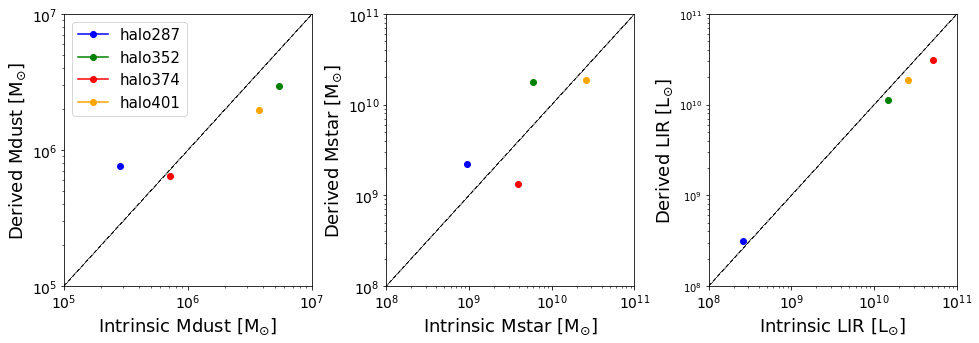

In [47]:
fig, ax = plt.subplots(figsize=(16, 5),nrows=1, ncols=3)

colors = ['blue', 'green', 'red', 'orange']
ids = ['halo287', 'halo352', 'halo374', 'halo401']

fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].tick_params(axis='both', which='minor', labelsize=10)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='minor', labelsize=10)
ax[2].tick_params(axis='x', which='major', labelsize=14)
ax[2].tick_params(axis='x', which='minor', labelsize=10)


for i in range(0, halo_set):
    ax[0].loglog(imdust[i], m_dust[i], c=colors[i], marker='o', label=ids[i])
    ax[0].plot([1e5, 1e8],[1e5, 1e8], color='black', lw=0.6, ls='-.')
    ax[1].loglog(imstar[i], m_star[i], c=colors[i], marker='o')
    ax[1].plot([1e7, 1e11],[1e7, 1e11], color='black', lw=0.6, ls='-.')
    ax[2].loglog(ilir[i], l_ir[i], c=colors[i], marker='o')
    ax[2].plot([1e8, 1e11],[1e8, 1e11], color='black', lw=0.6, ls='-.')

    
#ax[0, 0].set_xscale('log')
#ax[0, 0].set_yscale('log')
ax[0].set_ylim([1e5, 1e7])
ax[0].set_xlim([1e5, 1e7])

#ax[0, 1].set_xscale('log')
#ax[0, 1].set_yscale('log')
ax[1].set_ylim([1e8, 1e11])
ax[1].set_xlim([1e8, 1e11])

#ax[1, 0].set_xscale('log')
#ax[1, 0].set_yscale('log')
ax[2].set_ylim([1e8, 1e11])
ax[2].set_xlim([1e8, 1e11])


ax[0].set_ylabel('Derived Mdust [M$_{\odot}$]', fontsize=18)
ax[1].set_ylabel('Derived Mstar [M$_{\odot}$]', fontsize=18)
ax[2].set_ylabel('Derived LIR [L$_{\odot}$]', fontsize=18)

ax[0].set_xlabel('Intrinsic Mdust [M$_{\odot}$]', fontsize=18)
ax[1].set_xlabel('Intrinsic Mstar [M$_{\odot}$]', fontsize=18)
ax[2].set_xlabel('Intrinsic LIR [L$_{\odot}$]', fontsize=18)

ax[0].legend(loc='upper left', fontsize=15)
#plt.savefig('/Users/sidneylower/Desktop/halo_comparison.png', dpi=300)

In [9]:
test_list = []


In [34]:
num = np.array([1, 101, 95, 10, 12])
def number_org(num):
    if num < 10:
        new_num = '00'+str(num)
    elif num >= 10 and num <100:
        new_num = '0'+str(num)
    else:
        new_num = str(num)
    return new_num

In [35]:
test = []
for i in range(len(num)):
    test.append(number_org(num[i]))

In [36]:
test

['001', '101', '095', '010', '012']

In [39]:
try:
    print('do some things')
    pd.read_csv('/Users/sidneylower/Documents/test/test_'+test[4]+'.txt')
    print('do other things')
except: print('oops')

do some things
oops


In [73]:
names = ['a', 'b', 'c', 'mass']

In [55]:
names

['a', 'b', 'c', 'logmass']

In [48]:
mass_index = [i for i, s in enumerate(names) if 'mass' in s]

In [49]:
mass_index

[3]

In [56]:
names[3]

'logmass'

In [63]:
if 'logmass' is 'mass' or 'total_mass': print('do this')
else: print('actually do this')

do this


In [51]:
names[3]

'logmass'

In [62]:
'logmass' is 'total_mass'

False

In [74]:
if names[3] == 'mass' or names[3] =='total_mass':
    print('1')
else: print('0')

1


In [67]:
names[1]

'b'